# Problem Walkthrough

### Automobiles MSRP (manufacturer suggested retail price)

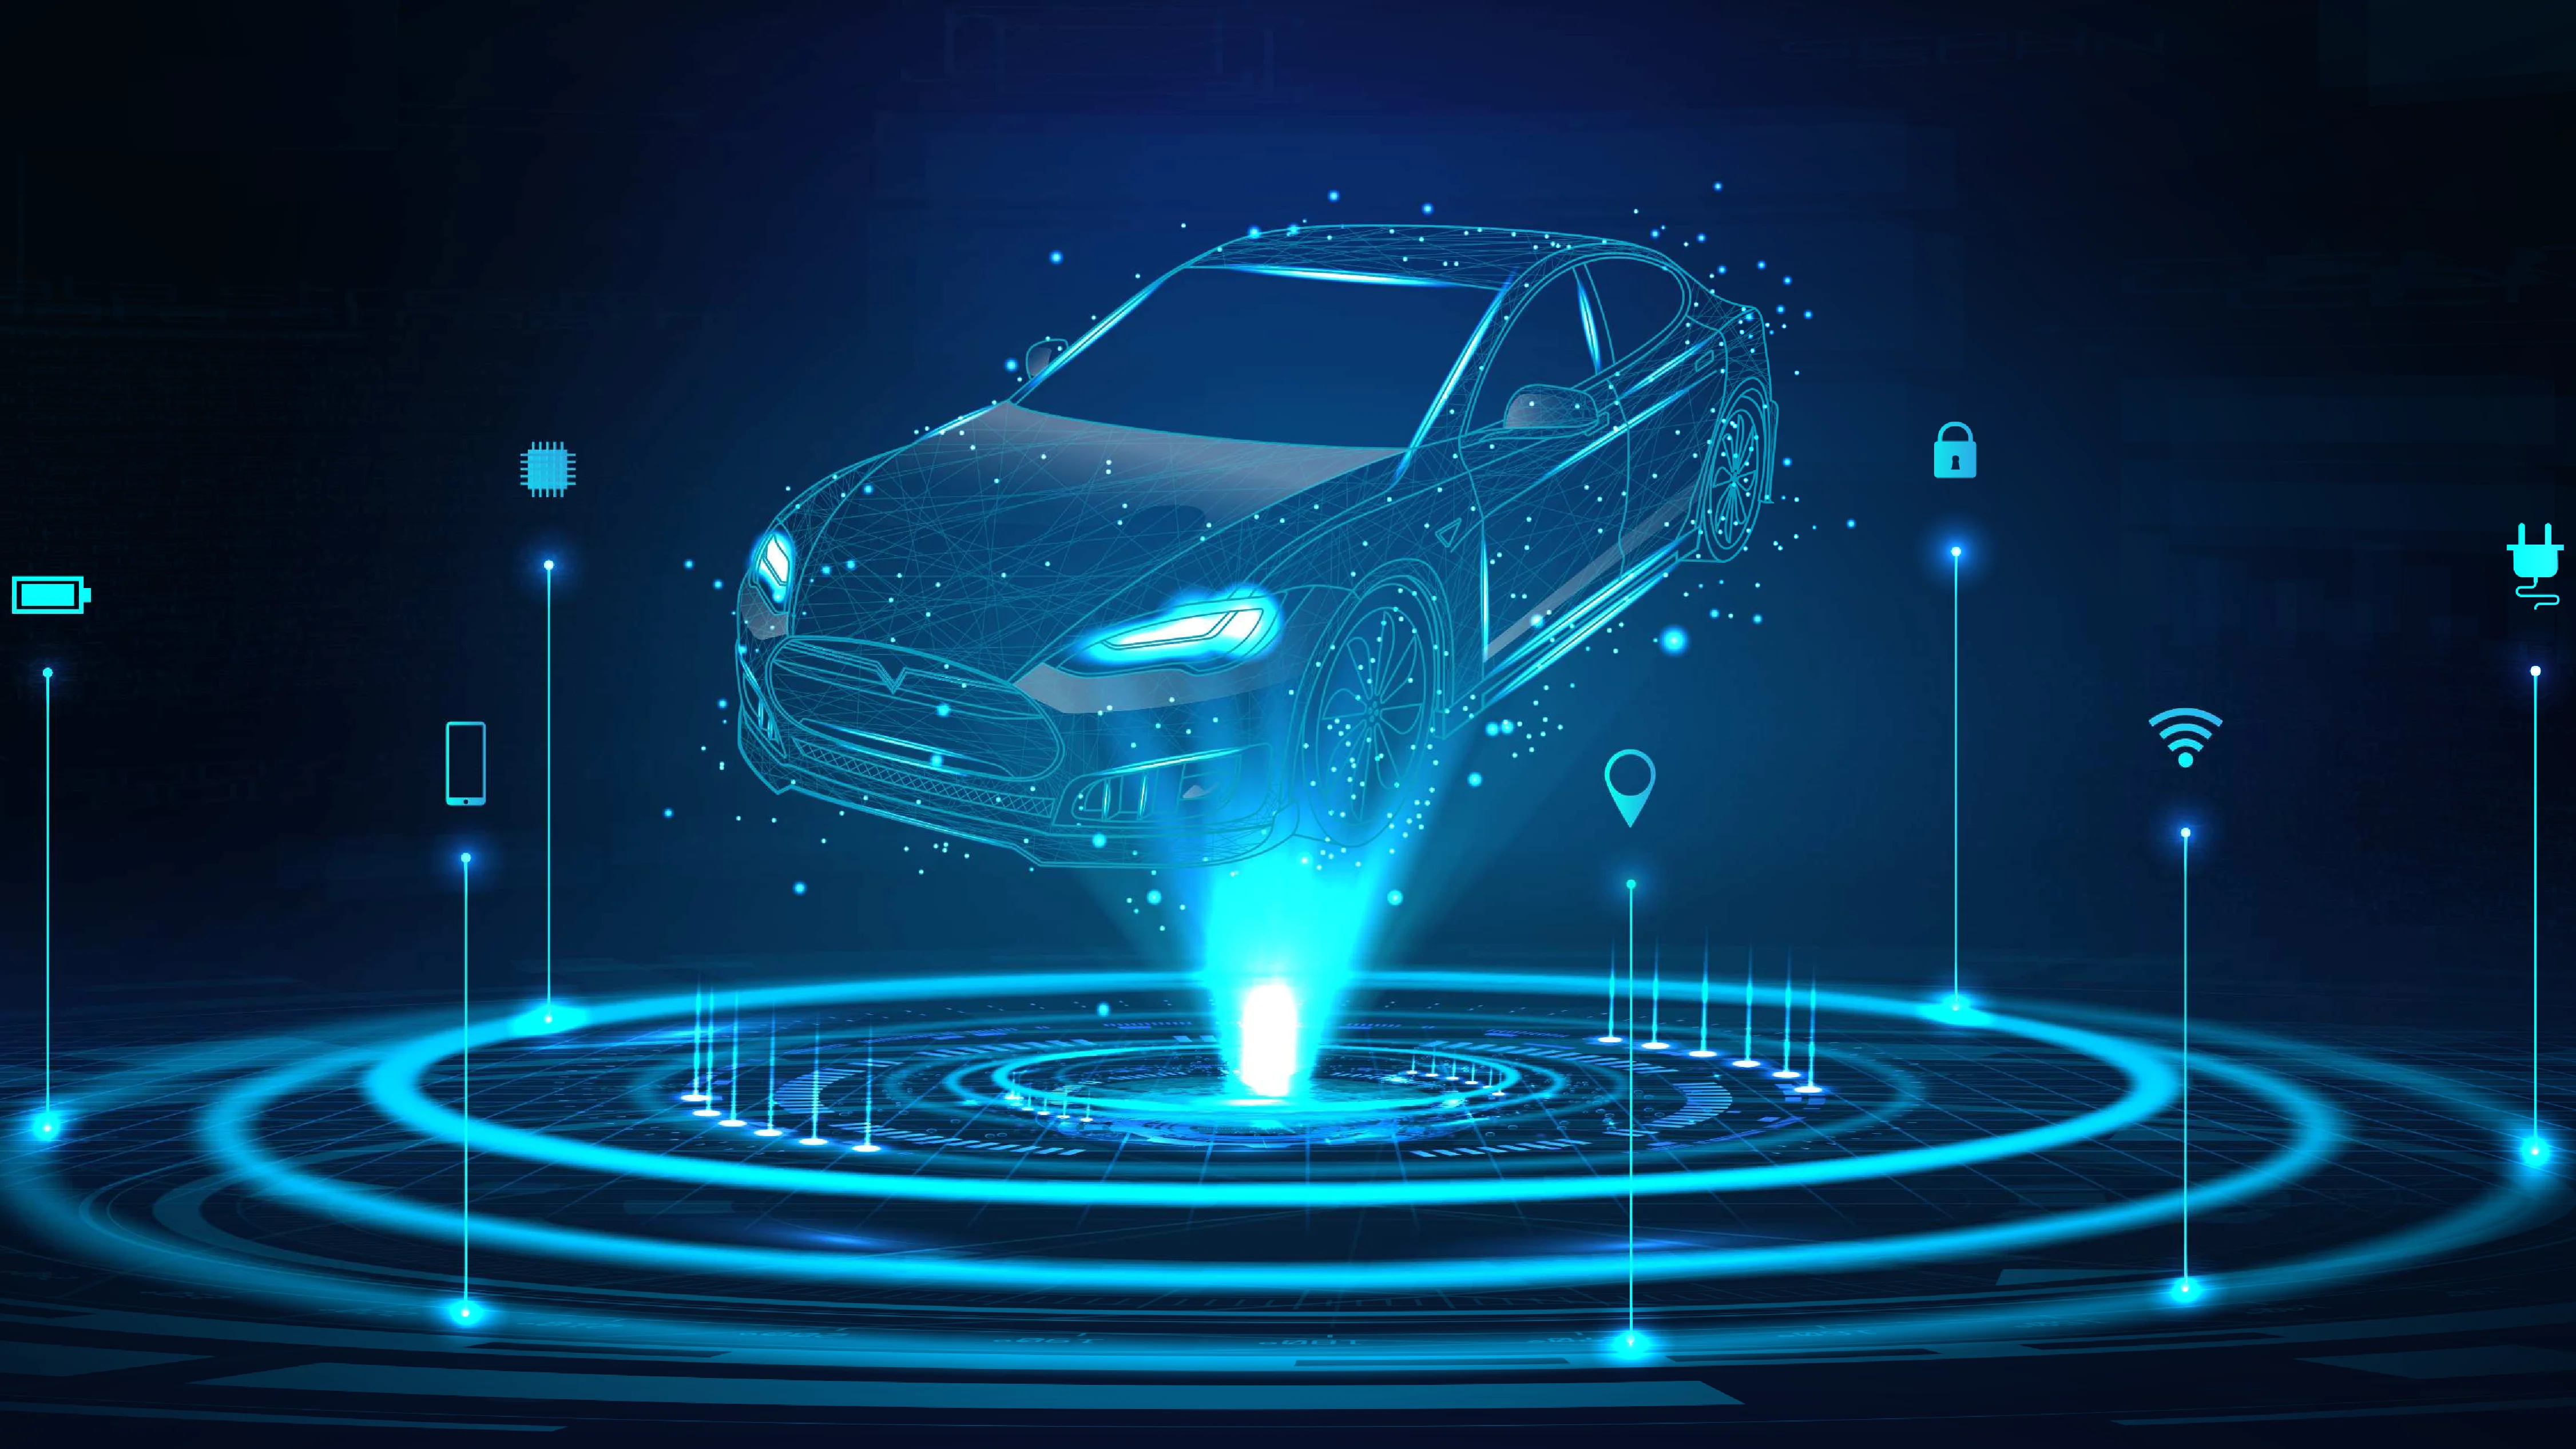

### What is the problem statement??
We want to infer which property characterstics of car are most predictive of its MSRP. Once we get it, Then we need to build a price prediction model with minimal error.

### Why are we even solving this problem?? 
Automobile industry market is continously emerging, with makers adopting world in class technologies, new players coming to the market, Automobile industry is getting more and more competitive. 
Hence it is very important for a car maker to know which features of the cars they should put their most focus on to generate more and more revenue. 

### Who are the stakeholders??
Car manufactures i.e BMW, Audi, Nissan, Ford etc. 

<hr>
<hr>

# Project Dependencies

First things first, let's import the libraries which will be used in our machine learning model.
>**Pandas:**<br> 
Pandas has been one of the most commonly used tools for Machine learning, which is used for data cleaning and analysis.Based on the features available in pandas we can say pandas is best for handling data. It can handle missing data, cleaning up the data and it supports multiple file formats. This means it can read or load data in many formats like CSV, Excel, SQL, etc.
In this project, we will load CSV file using Pandas. 

>**Numpy:**<br> 
NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

>**Math:**<br> 
Python has a built-in module that we can use for mathematical tasks. The math module has a set of methods and constants used to perform mathematical operations

>**SKLearn:**<br>
Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.
>>**Logistic Regression:** It is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.
>>>**Accuracy Score:** The accuracy_score function calculates the accuracy score for the final output we are trying to predict (target or Y) against the true outcome of the target.

>**Statsmodels:**<br>
As its name implies, statsmodels is a Python library built specifically for statistics. Statsmodels is built on top of NumPy, SciPy, and matplotlib, but it contains more advanced functions for statistical testing and modeling that you won't find in numerical libraries like NumPy or SciPy.

In [1]:
# These libraries will be used to perform data analysis and mathematical operations
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
import numpy as np
import math


# These libraries will be used to build data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# These libraries will be used to perform our machine learning model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

import statsmodels.api as sm

# Data Preparation


### Part 1

>**1st - Investigate our data** - We will use pandas (pd) to read our car pricing data (**CSV file - data**) and then investigate our dataset. And we will also note down our observations after viewing the first glance of the dataset.

>**2nd - Check for Data Types** - We will check if all the columns are rightly classified as the right data type. If not, we will change the data type.

>**3rd - Cleanup of Duplicates, Missing values** - If there are lots of missing values in a column ( eg: around 60% ), then we will drop those columns (rather than trying to impute with some value), if missing values are less (eg: around 10-15%), then we would safely impute the mean value of column in those cells. <br>
Also we will remove the duplicate values in the dataset. 

>**4th - Data Distribution/Range, Outlier Detection & Treatment** - We will visualize if our target variable is normally distributed. If it isn't normally distributed, we could do two things. <br>
firstly, we would remove the outliers from that column and keep checking the data distribution again until its normal, secondly, we could take the log function of the variable to make it normally distributed. Let's see how it goes.

>**5th - Feature Transformation** - There will be couple of predictor variables (features) which would be categorical in nature,so to understand them better, we will convert those to numerical values. 

>**6th - Feature Selection** - Once we tranform our features, they are ready for the analysis part. Now, we need to select the best features. Best means they should be highly correlated with our target variable, they should maintain higher level of data parity (i.e no missing values etc). <br>
Then we would perform data visualizations to check the distribution of data, and performing tasks such as removing outliers, taking log function etc so that our feature is normally distributed. <br>
Also, we will look at correlation between features, and remove the redundant features. 

### Part 2

>**7th - Data Partition** - Now as our target variable and predictor variables are all ready. We will now put all these potential predictor variables into new object called 'X'. Then, Put target variable in new object called 'y'.<br>
And finally, Partition data into training set and testing set. (Following the convention 😄)

>**8th - Deploying Machine Learning Models** - After partitioning of data, we will deply three machine learning models and also measure the performance of these models...

>**9th - Conclusion** - My feedback on final model's performance and my recommed strategies to car manufacturer leadership based on the whole analysis done.

# Part 1

### Let's get started.....

### Investigate our data:

In [2]:
# Let's read our CSV File and define it as df (dataframe)
df = pd.read_csv('data.csv')

# let's take a glance at our last 5 rows
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.00,6.00,AUTOMATIC,front wheel drive,4.00,Luxury,Midsize,Sedan,26,17,61,28995


### **Observations:**<br>
>**Total 11914 Records**<br><br>
>>**Our Target Variable?:** As mentioned in the problem statement and being evaluated the CSV, It should be **MSRP**<br>

>Mentioning below my thoughts on what the relation of the features would be with 'MSRP'. This would be validated later in the notebook.

| **Feature**       | **Thoughts/Expectations**                     |
|------------------	|-------------------------------------------	|
| **Maker:**    	| Just FYI, might be used later when we have to predict MSRP only for a specific maker |
| **Model:**      	| Indicator (neutral)                        	|
| **Year:** 	    | Expect a (+) correlation with MSRP 	        |
| **Engine Fuel Type:** | Might be (+) correlated with highway and city mpg	|
| **Engine HP:** 	| Expect a (+) correlation with MSRP            |
| **Engine Cylinders:** | Might be (+) correlated with Engine HP    |
| **Transmission Type:**| Meant for driver's experience (neutral)         |
| **Driven_Wheels:** | Meant for driver's experience (neutral)     |
| **Number of Doors:** | (neutral) This should not impact price. just a showcase and for segmented customers {Mostly rich} |
| **Market Category:**  | Indicator (neutral), might be used later when we have to predict MSRP only for a specific Market Category   |
| **Vehicle Size:** | Expect a (+) correlation with MSRP |
| **Vehicle Style:** |Expect a (+) correlation with MSRP |
| **Highway MPG**    | Expect a (+) correlation with MSRP           |
| **City MPG**       | Expect a (+) correlation with MSRP        	|
| **Popularity**     | Expect a (+) correlation with MSRP, Fundamental Economics|

### Check Data Types:

In [3]:
#  let's get a brief understanding about our data set, this will tell us what type of data each column has...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
# To know how many null values each column has....
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

So, from above two operations. We can conclude two things:<br>
<br>
**First**, now we can infer whether the column has integer values or object values **or** In terms of Machine learning language, we now know whether our potential features (independent variables) are of numerical values or categorical values. <br><br>
**Second**, we can understand that which variables have null values. We could clearly see **Market Category** has **significant** <u>null values</u>.
So now, we need to decide if we should drop this entire column or not. Dropping is subjected to further investigation.<br> Whereas, In Engine HP and Engine Cylinder columns, As the missing values are relatively miniscule, we will impute the mean. 
values in missing cells. <br>
And for <u>'Number of Doors'</u>, Missing values are only 6. S, we will remove those rows

### Let's investigate more about 'Market Category' and its relationship with MSRP

In [5]:
#Firstly,we will see what are the unique values in this attribute

names = list(df['Market Category'].unique())
dataframe = pd.DataFrame(names)
dataframe

# Use the code below to see all values in 'Market Category'...
# print(dataframe.to_string())  

,0
0,"Factory Tuner,Luxury,High-Performance"
1,"Luxury,Performance"
2,"Luxury,High-Performance"
3,Luxury
4,Performance
...,...
67,"Performance,Hybrid"
68,"Crossover,Factory Tuner,Performance"
69,"Crossover,Diesel"
70,"Flex Fuel,Diesel"


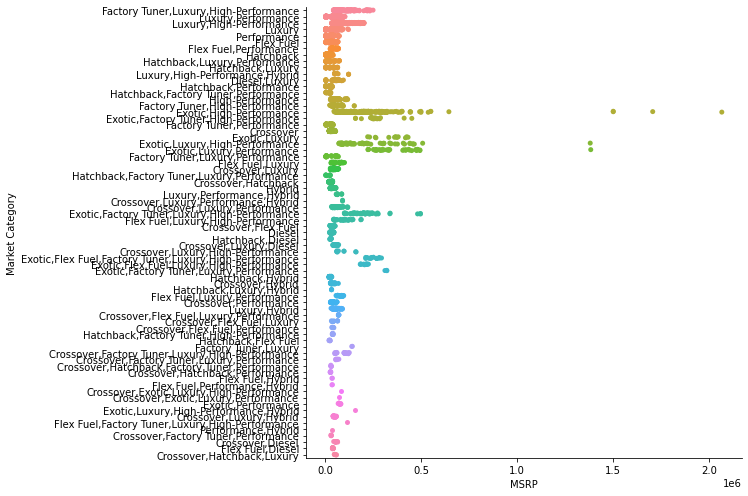

In [6]:
#Now, let's plot graph to see what's the relation between 'Market Category' and 'Price'

sns.catplot(x="MSRP",y="Market Category", data=df, height=7,aspect=1.5)

### **Observations:**<br>
>**Market Category has total 72 unique records**<br><br>
>>We used **catplot** to find the relationship between <u>Market Category</u> and <u>MSRP</u>. From the visual above, we can now understand that the <u>MSRP</u> is almost same (within same range) for each <u>Market Category</u> except for few. So, Its safe to assume that <u>Market Category</u>is insensitive to <u>MSRP</u>.<br>
And hence, its safe to drop this attribute now.

### Now, Let's further investigate on the relationship of 'Engine HP', 'Engine Cylinders' v/s 'MSRP'

<AxesSubplot:xlabel='Engine HP', ylabel='MSRP'>

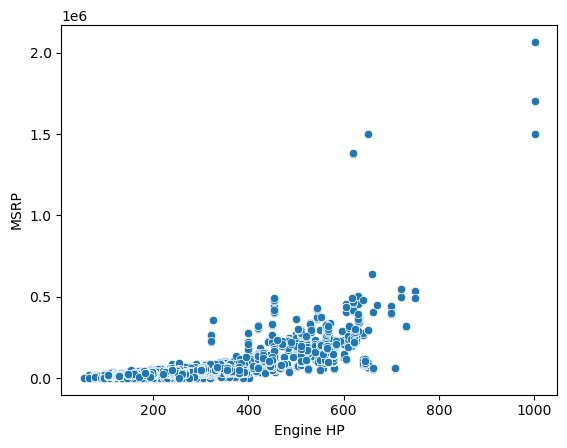

In [7]:
# Visualizing scatter plot of Engine HP v/s MSRP

sns.scatterplot(x='Engine HP',y='MSRP',data=df)

<AxesSubplot:xlabel='Engine Cylinders', ylabel='MSRP'>

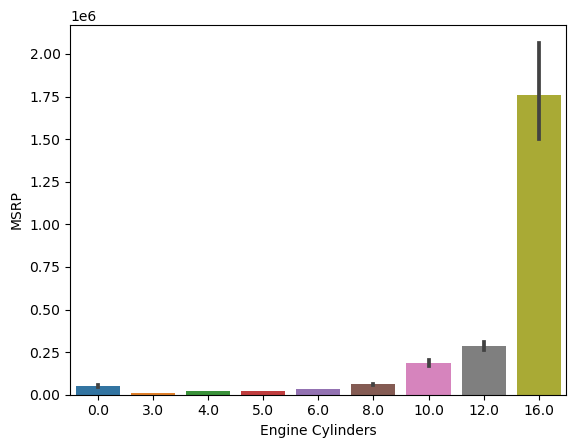

In [8]:
# Visualizing scatter plot of Engine Cylinders v/s MSRP

sns.barplot(x='Engine Cylinders',y='MSRP',data=df)

### **Observations:**<br>
> From above two plots, we could easily say that there is a linear relationship between, 'Engine HP', 'Engine Cylinders' and 'MSRP'. So for now, we have to keep these variables in our dataframe as they are our potential predictors. 

### Cleanup of Duplicates, Missing values

So now, As we found that 'Market Category' has loads of missing values and also it is not sensitive to 'MSRP', we will drop this column.<br>
And we will impute mean values in 'Engine HP' and 'Engine Cylinders' as they are our potential predictors.

In [9]:
# Dropping 'Market Category'

df = df.drop('Market Category',axis=1)

In [10]:
# Understanding Stats of 'Engine HP' before imputation

df['Engine HP'].describe()

count   11845.00
mean      249.39
std       109.19
min        55.00
25%       170.00
50%       227.00
75%       300.00
max      1001.00
Name: Engine HP, dtype: float64

In [11]:
# Understanding Stats of 'Engine Cylinders' before imputation

df['Engine Cylinders'].describe()

count   11884.00
mean        5.63
std         1.78
min         0.00
25%         4.00
50%         6.00
75%         6.00
max        16.00
Name: Engine Cylinders, dtype: float64

So, After checking the stats of 'Engine HP' and 'Engine Cylinders', I would impute the **missing values** in them with their **Median**

In [12]:
# Imputing median in missing values of Engine HP

df['Engine HP'].fillna(df['Engine HP'].median(), inplace=True)

In [13]:
# Imputing median in missing values of Engine Cylinders

df['Engine Cylinders'].fillna(df['Engine Cylinders'].median(), inplace=True)

**Let's remove the missing values (Entire rows). Because, Number of doors has only 6 null values**

In [14]:
# drop all rows that contain missing values
df = df.dropna()

**Also, let's remove the duplicate rows, if any.** 

In [15]:
# drop any duplicate records

df.drop_duplicates(inplace=True)

#### So, as we are done with removing duplicates and taking care of missing values, Lets now check our dataset again and see how good it looks now 😀

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11185 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11185 non-null  object 
 1   Model              11185 non-null  object 
 2   Year               11185 non-null  int64  
 3   Engine Fuel Type   11185 non-null  object 
 4   Engine HP          11185 non-null  float64
 5   Engine Cylinders   11185 non-null  float64
 6   Transmission Type  11185 non-null  object 
 7   Driven_Wheels      11185 non-null  object 
 8   Number of Doors    11185 non-null  float64
 9   Vehicle Size       11185 non-null  object 
 10  Vehicle Style      11185 non-null  object 
 11  highway MPG        11185 non-null  int64  
 12  city mpg           11185 non-null  int64  
 13  Popularity         11185 non-null  int64  
 14  MSRP               11185 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


#### Wow!!! So finally we have made our dataset cleaned 🥳. There are no null, missing and duplicate values. Now its time to deep dive and analyze our target variable (MSRP) to understand if it is good to fit in our model. 

### Data Distribution/Range, Outlier Detection & Treatment

Let's define a temporary dataframe which only contains numerical variables : **df_temp**

In [17]:
# we created object 'Numeric' and telling it that you should be only either float or integer
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# defining temporary dataframe
df_temp = df.select_dtypes(include=numerics)

In [18]:
# To calculate stats of the numerical variables

pd.DataFrame(dict(mean = df_temp.mean().round(2),
                  median = df_temp.median().round(2),
                  std_dev = df_temp.std().round(2),
                  min_val = df_temp.min().round(2),
                  max_val = df_temp.max().round(2),
                  missing_vals = df_temp.isnull().sum()
                 ))

,mean,median,std_dev,min_val,max_val,missing_vals
Year,2010.71,2015.00,7.23,1990.00,2017.00,0
Engine HP,253.23,236.00,109.82,55.00,1001.00,0
Engine Cylinders,5.67,6.00,1.79,0.00,16.00,0
Number of Doors,3.45,4.00,0.87,2.00,4.00,0
highway MPG,26.58,25.00,8.83,12.00,354.00,0
city mpg,19.70,18.00,9.03,7.00,137.00,0
Popularity,1558.22,1385.00,1445.87,2.00,5657.00,0
MSRP,41897.61,30670.00,61515.29,2000.00,2065902.00,0


**Oh whatt?? 😲 We see from the table that our target variable is highly skewed. There is a very big gap between median and mean. <br>
So, Let's plot a histogram to understand the distribution of MSRP!**

<AxesSubplot:xlabel='MSRP', ylabel='Count'>

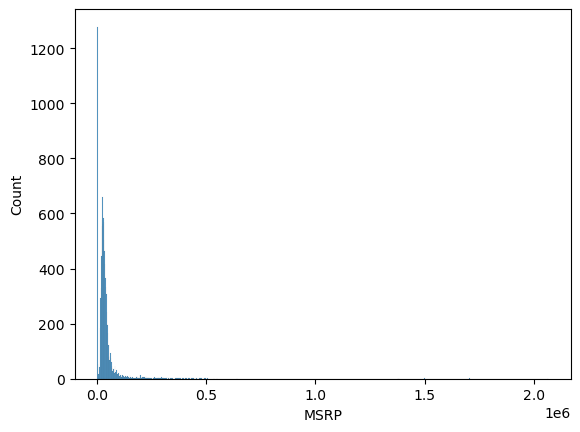

In [19]:
#Plotting Histogram of MSRP
sns.histplot(df_temp['MSRP'])

I could not infer much from the histogram plotted above, so let's plot a boxplot, Might be we get some outlier details from boxplot.....


<AxesSubplot:xlabel='MSRP'>

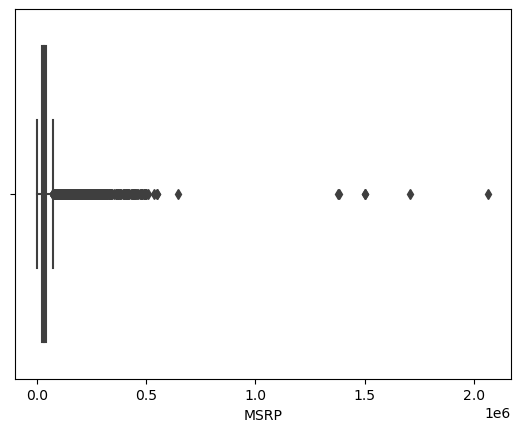

In [20]:
#Plotting Boxplot of MSRP
sns.boxplot(x='MSRP',data=df_temp)

**Yess!!! We could clearly see from the boxplot that there are few outliers in MSRP which is skewing the MSRP distribution. <br>
So, let's remove the outliers. <br>
But to know the threshold, First I need to understand the MSRP values in descending order.**

In [21]:
# Sorting MSRP in descending order
df_temp_desc = df_temp.sort_values(by='MSRP',ascending=False).iloc[0:15,:]
df_temp_desc

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
11362,2008,1001.00,16.00,2.00,14,8,820,2065902
11364,2009,1001.00,16.00,2.00,14,8,820,1705769
11363,2008,1001.00,16.00,2.00,14,8,820,1500000
8486,2008,650.00,12.00,2.00,14,9,1158,1500000
6351,2012,620.00,12.00,4.00,16,10,67,1382750
6350,2011,620.00,12.00,4.00,16,10,67,1380000
4024,2003,660.00,12.00,2.00,12,7,2774,643330
1626,2015,720.00,12.00,2.00,16,10,1158,548800
1622,2014,720.00,12.00,2.00,16,10,1158,548800
1629,2016,750.00,12.00,2.00,18,11,1158,535500


#### See! We have 6 cars who have significantly high MSRP, like the MSRP looks above normal..
#### Now I want to know the maker of these cars

In [22]:
# Merging the MSRP descended temp dataframe with "Make", and then descending the whole table again based on MSRP
df_temp_merged = pd.merge(df['Make'],df_temp_desc,right_index=True,left_index=True)
df_temp_merged_desc = df_temp_merged.sort_values(by='MSRP',ascending=False).iloc[0:15,:]
df_temp_merged_desc

,Make,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
11362,Bugatti,2008,1001.00,16.00,2.00,14,8,820,2065902
11364,Bugatti,2009,1001.00,16.00,2.00,14,8,820,1705769
8486,Lamborghini,2008,650.00,12.00,2.00,14,9,1158,1500000
11363,Bugatti,2008,1001.00,16.00,2.00,14,8,820,1500000
6351,Maybach,2012,620.00,12.00,4.00,16,10,67,1382750
6350,Maybach,2011,620.00,12.00,4.00,16,10,67,1380000
4024,Ferrari,2003,660.00,12.00,2.00,12,7,2774,643330
1622,Lamborghini,2014,720.00,12.00,2.00,16,10,1158,548800
1626,Lamborghini,2015,720.00,12.00,2.00,16,10,1158,548800
1629,Lamborghini,2016,750.00,12.00,2.00,18,11,1158,535500


**Soo, These 6 cars are nonetheless but Maybach, Bugatti, Lamborghini. For sure, the prices for some of the models of these cars will be humongous high.. <br>
Might be these cars are highly customized or might be used before by some big celebrity.. So, its better to drop these cars from our dataset.**
<br>
<br>

><I>So lets drop the cars whose MSRP is greater than <b>70,000 dollars</b></I>

In [23]:
# Dropping Cars whose MSRP is higher than 70000
df_temp = df_temp[df_temp['MSRP'] < 70000]

 **Now lets again calculate our stats!!**

In [24]:
# Calculating the stats of numerical variables after revision of MSRP

pd.DataFrame(dict(mean = df_temp.mean().round(2),                           
                  median = df_temp.median().round(2),
                  std_dev = df_temp.std().round(2),
                  min_val = df_temp.min(),
                  max_val = df_temp.max(),
                  missing_vals = df_temp.isnull().sum()
                 ))

,mean,median,std_dev,min_val,max_val,missing_vals
Year,2010.42,2015.00,7.43,1990.00,2017.00,0
Engine HP,230.22,220.00,80.48,55.00,707.00,0
Engine Cylinders,5.38,6.00,1.45,0.00,12.00,0
Number of Doors,3.51,4.00,0.84,2.00,4.00,0
highway MPG,27.06,26.00,8.70,12.00,354.00,0
city mpg,20.18,19.00,8.94,10.00,137.00,0
Popularity,1572.87,1385.00,1466.17,21.00,5657.00,0
MSRP,29172.13,28999.00,15477.96,2000.00,69980.00,0


**Yess!! Now our target variable looks in good shape.. As the Mean and Mean are pretty closer now.. 
To validate if MSRP is not skewed, I will further plot it again on histogram.**

<AxesSubplot:xlabel='MSRP', ylabel='Count'>

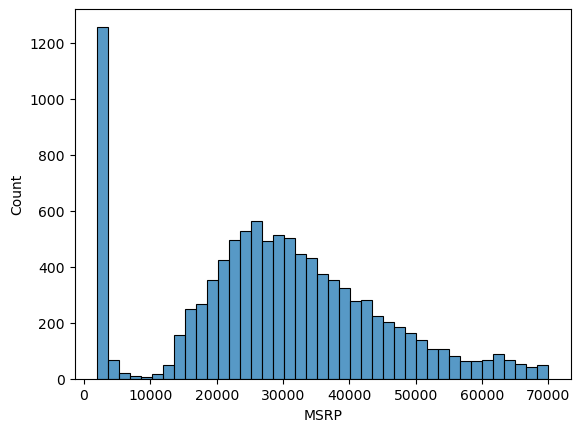

In [25]:
#Plotting Histogram of MSRP again after droping values > 70000
sns.histplot(df_temp['MSRP'])

#### Oh wait, what?? 😮 We aren't done yet! See, there is a big spike in MSRP where it's priced at 2000 dollars. Let's investigate about these cars

In [26]:
# MSRP in ascending order
df_temp_desc = df_temp.sort_values(by='MSRP',ascending=True).iloc[0:15,:]

# Merging the MSRP ascended temp dataframe with "Make", and then ascending the whole table again based on MSRP to 
# know which Cars ('Make') are causing spikes at the beggining.
df_temp_merged = pd.merge(df['Make'],df_temp_desc,right_index=True,left_index=True)
df_temp_merged_desc = df_temp_merged.sort_values(by='MSRP',ascending=True).iloc[0:30,:]
df_temp_merged_desc

,Make,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
776,Volvo,1995,168.00,5.00,4.00,26,18,870,2000
777,Volvo,1995,222.00,5.00,4.00,24,17,870,2000
779,Volvo,1995,240.00,5.00,4.00,24,17,870,2000
780,Volvo,1996,222.00,5.00,4.00,24,17,870,2000
781,Volvo,1996,222.00,5.00,4.00,24,17,870,2000
782,Volvo,1996,168.00,5.00,4.00,26,18,870,2000
784,Volvo,1996,240.00,5.00,4.00,24,17,870,2000
785,Volvo,1996,168.00,5.00,4.00,26,18,870,2000
786,Volvo,1996,240.00,5.00,4.00,24,17,870,2000
790,Volvo,1997,168.00,5.00,4.00,26,18,870,2000


#### Phew!! So these are old cars which got manufactured some 20-25 years back and that's why their MSRP is so less, so let's remove these cars from our target variable too.

#### But before removing these cars which are priced at 2000, I want to understand till MSRP of 10000, how does the distribution looks like...

#### 10000 because, In the histogram plot right above, I see significant distribution till 10000 

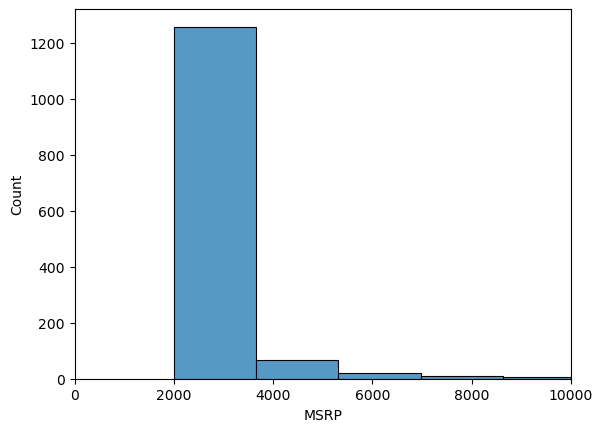

In [27]:
#checking distribution of cars whose MSRP is under 10000
sns.histplot(df_temp['MSRP'])
plt.xlim(0,10000)
plt.show()

In [28]:
#Counting number of cars whose MSRP is less than 10000
print('No. of cars with MSRP < 10000 :', len(df_temp[df_temp['MSRP'] < 10000]))

No. of cars with MSRP < 10000 : 1357


**So, there are 1357 cars whose MSRP is less than 10000. We will go ahead with dropping these cars as the MSRP starts to distribute normally above 10000**

In [29]:
#Dropping cars with MSRP > 10000
df_temp = df_temp[df_temp['MSRP'] > 10000]

<AxesSubplot:xlabel='MSRP', ylabel='Count'>

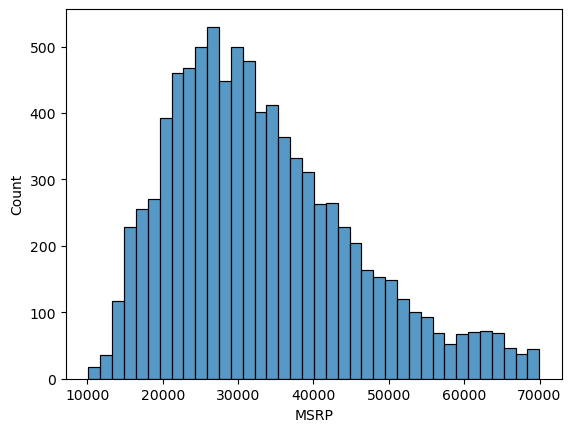

In [30]:
#Plotting histogram again to check distribution of MSRP
sns.histplot(df_temp['MSRP'])

So, MSRP looks normally distributed, But.... It looks skewed towards right.., So let's take **Logarithmic Transformation** of MSRP to make it better normally distributed and reduce the skewness.. 

**What is Logarithmic Transformation?? And why do we use it in Machine Learning??**<br>
Log transformation is a data transformation method in which it replaces each variable x with a log(x). In machine learning, it is used when our original continuous data do not follow the bell curve, so we take log transform of this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid. 

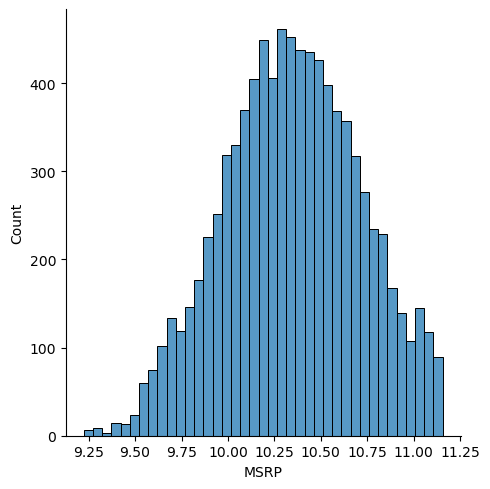

In [31]:
#Taking Log tranformation of MSRP
sns.displot(np.log1p(df_temp['MSRP']))

Soo, MSRP looks in much better shape now. Its looks really well normally distributed.... <br>
With this, we have finished the treatment of our **Target Variable 'MSRP'**, lets look again at table now to check the revised stats of MSRP.. 

In [32]:
# Calculating the stats of MSRP after its revision
pd.DataFrame(dict(mean = df_temp.mean().round(2),                           
                  median = df_temp.median().round(2),
                  std_dev = df_temp.std().round(2),
                  min_val = df_temp.min(),
                  max_val = df_temp.max(),
                  missing_vals = df_temp.isnull().sum()
                 ))

,mean,median,std_dev,min_val,max_val,missing_vals
Year,2012.77,2015.00,4.58,1994.00,2017.00,0
Engine HP,239.55,240.00,79.44,66.00,707.00,0
Engine Cylinders,5.35,6.00,1.44,0.00,10.00,0
Number of Doors,3.60,4.00,0.78,2.00,4.00,0
highway MPG,27.62,27.00,8.99,13.00,354.00,0
city mpg,20.62,19.00,9.40,10.00,137.00,0
Popularity,1583.84,1385.00,1451.43,21.00,5657.00,0
MSRP,33295.13,31217.50,12217.06,10135.00,69980.00,0


**Now our Target variable is in good shape and its good to go for further analysis...**

In [33]:
#Before proceeding further, let's update our main dataframe...
df = df[df['MSRP'] > 10000]
df = df[df['MSRP'] < 70000]

<h3>Now let's take a Quick look at correlations</h3><br>

> Now that we've cleaned up our <b>Target Variable</b>, Its safe now to look towards correlation between target variable v/s other numerical variables, so that we could find out which of them can be our best potential predictors. So, its time to investigate into other numerical variables. <br>
>> What also we would be doing is that, we will look at the correlation between one numerical feature and other, and if both of them are highly correlated, we would remove one of them to avoid <b>redundancy</b>

In [34]:
#Finding correlation between all numerical variables..
df.select_dtypes(include=numerics).corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.00,0.22,-0.15,0.13,0.27,0.21,0.14,0.31
Engine HP,0.22,1.00,0.74,-0.04,-0.40,-0.38,0.10,0.77
Engine Cylinders,-0.15,0.74,1.00,-0.01,-0.61,-0.57,0.08,0.49
Number of Doors,0.13,-0.04,-0.01,1.00,0.03,0.05,-0.06,0.01
highway MPG,0.27,-0.40,-0.61,0.03,1.00,0.87,-0.02,-0.20
city mpg,0.21,-0.38,-0.57,0.05,0.87,1.00,-0.00,-0.19
Popularity,0.14,0.10,0.08,-0.06,-0.02,-0.00,1.00,0.04
MSRP,0.31,0.77,0.49,0.01,-0.20,-0.19,0.04,1.00


### Observation

Let's note down all numerical variables below which seems to be/be not correlated with MSRP.. 

>**1. Engine HP :**  This variable is **highly and positively** correlated with MSRP. <br>
>**2. Engine Cylinders :** This variable is also **highly and positively** correlated with MSRP. <br>
>**3. Year :** This variable is **slightly and positively** correlated with MSRP. <br>
>**4. Highway MPG :** This variable is **slightly and negatively** correlated with MSRP. <br>
>**5. City MPG :** This variable is also **slightly and negatively** correlated with MSRP. <br>
>**6. Number of Doors :** This variable is also **slightly and negatively** correlated with MSRP. <br>
>**7. Popularity :** This variable is almost not correlated with MSRP, as value is **very** close to zero <br>

Let's note down the numerical variables below which seems to correlated with other numerical variables..

>**1. Engine Cylinders :** This variable is **highly and positively** correlated with Engine HP. <br>
>**2. City MPG :** This variable is **highly and positively** correlated with Highway MPG. <br>

So, to avoid redundancy, let's drop 'Engine Cylinders' and 'City MPG'..

In [35]:
#Dropping Engine Cylinders and City MPG as they are highly correlated with other numerical variables...
df = df.drop(['Engine Cylinders','city mpg'], axis=1)

Now, Let's **LOOK** at scatterplots involving MSRP and seemingly uncorrelated vars (which could include slighly correlated as well)...... <br>
just to make sure we're doing our best job at choosing best predictors...

<AxesSubplot:xlabel='highway MPG', ylabel='MSRP'>

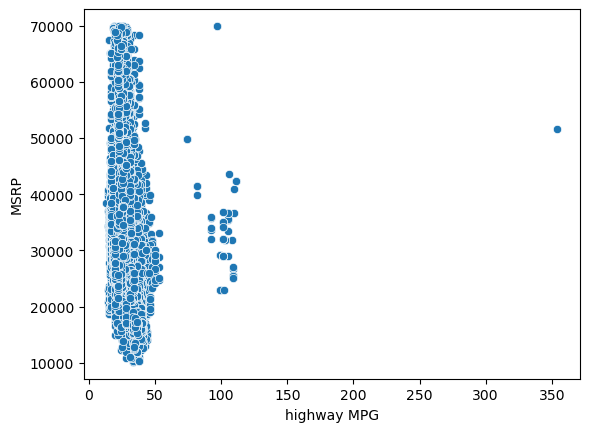

In [36]:
#Plotting relationship between Highway MPG and MSRP
sns.scatterplot(x='highway MPG',y='MSRP',data=df)

> What we could infer is, when highway MPG increase, MSRP goes down... <br>
> Also, MSRP is at its highest when highway MPG is lowest and vice versa... So, It is validated that highway MPG and MSRP are negatively correlated..

<AxesSubplot:xlabel='Popularity', ylabel='MSRP'>

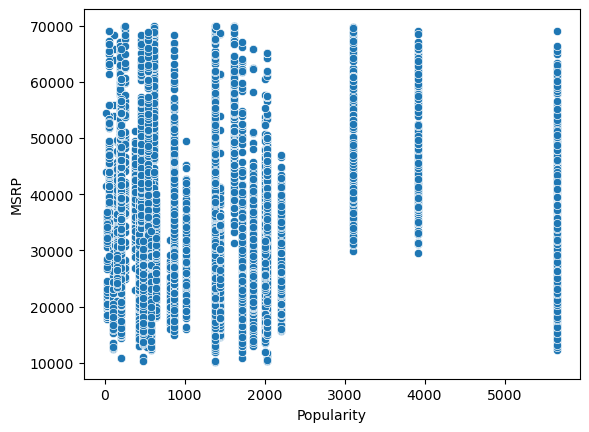

In [37]:
#Plotting relationship between Popularity and MSRP
sns.scatterplot(x='Popularity',y='MSRP',data=df)

Couldn't infer any relation between Popularity and MSRP, the distribution is pretty random.

<AxesSubplot:xlabel='Number of Doors', ylabel='MSRP'>

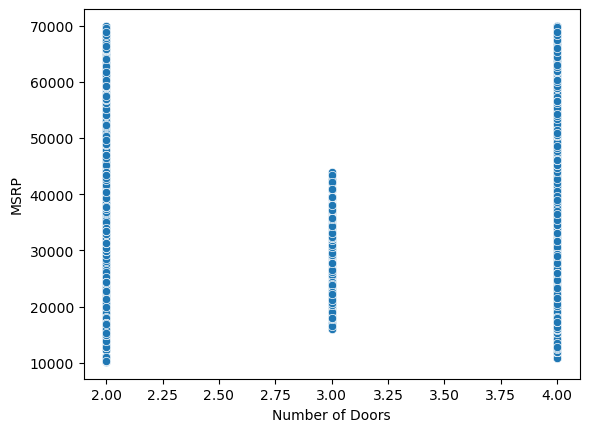

In [38]:
#Plotting relationship between Number of Doors and MSRP
sns.scatterplot(x='Number of Doors',y='MSRP',data=df)

Same here!!! Couldn't infer any relationship between 'Number of Doors' and 'MSRP' as the distribution is very random.. 

**So, we have validated that 'Number of doors' and 'Popularity' are unrelated with MSRP, Hence its safe to drop these variables..**

In [39]:
#Dropping Number of Doors and Popularity..
df = df.drop(['Number of Doors','Popularity'], axis=1)

>So, we have dropped the numerical variables which were unrelated with MSRP, So we are left with three numerical variables now.<br>
<u>Also, We have seen that Engine Hp, Year, Highway MPG are not skewed (No Outliers) as their 'Mean' and 'Median' are almost close.</u><br>
>So, <b>'Engine HP', 'Year' and 'Highway MPG'</b> are good to use as predictors later in our Model..<br><br>

So, let's move on now to Investigate **'Categorical Variables'**

><h3>Categorical Variables</h3>
Let's take a close look at our list of categorical variables and get these cleaned up and ready for modeling

First, We will define a object named 'Categorical', and tell him that you are all those data whose type is 'Object'. And then let's merge all those categorical variables with MSRP to understand the relationship....

In [40]:
#Defining that categorical variables are those whose data type is 'Object'..
categorical = ['object']

#Defining a temporary dataframe which contains MSRP merged with categorical variables.. 
df_temp = pd.merge(df['MSRP'],df.select_dtypes(include=categorical),left_index=True,right_index=True)

In [41]:
#let's see the first 5 rows...
df_temp.head()

,MSRP,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
0,46135,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
1,40650,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible
2,36350,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
3,29450,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
4,34500,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible


Now, let's see the relationship between these categorical variables and MSRP with help of **catplot...**

### 1. Make:

Let's first count the unique values of 'Make' which exists in our dataframe..

In [42]:
#Counting the unique values of 'Make' 
df_temp['Make'].nunique()

39

So, 39 unique values.. It would be very difficult to see the relation between each 39 'Makers' and 'MSRP'. So, Let's convert this 39 values to 5. We would keep top 5 values of 'Make' (Based on count) and label remaining values to 'Other'. 

In [43]:
# Keep top 5 Makes and label all the rest as "OTHER"
keep = df_temp['Make'].value_counts().index[:5]
df_temp['Make'] = np.where(df_temp['Make'].isin(keep), df_temp['Make'], 'Other')

Now, let's Plot relation between 'Make' and 'MSRP' and see if we could infer something...

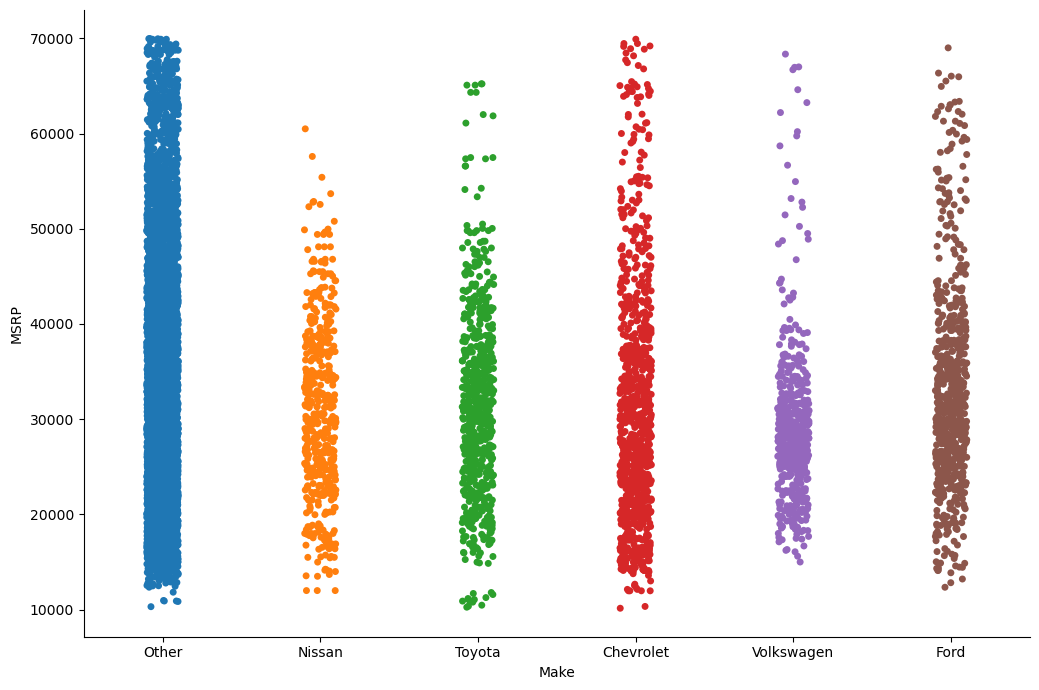

In [44]:
#Catplot to find relation between 'Make' and 'MSRP'
sns.catplot(x="Make", y="MSRP", data=df_temp, height=7,aspect=1.5)

> ### Observation:
> So, MSRP distribution for top 5 cars is pretty much same, in a way where the highest MSRP of each of these cars fall in range of 60000-70000, while the lowest MSRP of each of these cars fall between 10000-20000 range. <br>
> For cars falling in 'Other', they are evenly distributed through out the range.. <br>
> For sure, MSRP is sensitive to Make, As see for example, Chevrolet has majority of cars falling between MSRP of 14000-45000, but for Volkswagen, majority of cars fall between range of 25000-35000.. <br>
> To understand the MSRP sensitivity with Make better, we will plot a table with Make vs 'Avg MSRP' later. But this is what we could infer from the catplot..

### 2. Model:

Let's first count the unique values of 'Model' which exists in our dataframe..

In [45]:
#Counting the unique values of 'Make' 
df_temp['Model'].nunique()

613

613 unique values.. These are loads of values...<br>
So, A car maker can launch mutiple models of a car. Each model can be modified every year. For sure, these models will have different MSRP.. But in our analysis, 613 values of Model.. We can't even group these values into top 5 and label values of remaining as "Other'. <br>
Also, feeding 613 models as predictor might result in overfitting in data.. <br>
So, We will go ahead and drop the 'Model' column...

In [46]:
# Dropping the Model Column..
df_temp.drop('Model',axis=1,inplace=True)

### 3. Engine Fuel Type:

In [47]:
#Finding out the unique values in 'Engine Fuel Type'
print(df_temp['Engine Fuel Type'].unique())
print('Count :',df_temp['Engine Fuel Type'].nunique())

['premium unleaded (required)' 'premium unleaded (recommended)'
 'flex-fuel (unleaded/E85)' 'regular unleaded' 'diesel' 'electric'
 'flex-fuel (premium unleaded recommended/E85)' 'natural gas'
 'flex-fuel (unleaded/natural gas)'
 'flex-fuel (premium unleaded required/E85)']
Count : 10


In [48]:
#Catplot to find relationship between 'Engine Fuel Type' and 'MSRP'

#sns.catplot(y="MSRP", x="Engine Fuel Type", data=df_temp, height=7,aspect=1.5,kind='bar')

So, 10 unique values for 'Engine Fuel Type'. 'Engine Fuel type' is a critical parameter to decide the MSRP of car, because higher the car is fuel efficient, higher the MSRP.. <br>
To understand the relationship between them further, we plotted catplot..<br>
And catplot showed that the Engine Fuel Type is MSRP sensitive, as the distribution varied for each MSRP. So, let's keep this categorical variable in the potential list of our predictors.. 

### 4. Transmission Type:

In [49]:
#Finding out the unique values in 'Transmission Type'
print(df_temp['Transmission Type'].unique())
print('Count :',df_temp['Transmission Type'].nunique())

['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE']
Count : 4


In [50]:
#Catplot to find relationship between 'Transmission Type' and 'MSRP'

#sns.catplot(y="MSRP", x="Transmission Type", data=df_temp, height=7,aspect=1.5)

Transmission type affects vehicle fuel consumption in two ways:<br><br>
**First**: Increasing the number of gear ratios and providing a larger ratio spread allows the internal combustion engine to operate more often in regions of high efficiency. <br><br>
**Second**: Reducing parasitic losses within the transmission improves transmission efficiency and reduces vehicle fuel consumption.<br><br>

So, what we could comprehend that, Transmission type is correlated with Fuel Consumption and thus affecting the MSRP..<br>
Now, coming to facts, we plotted a catplot above to understand the distribution of MSRP based on Transmission type, and we found that 'Transmission Type' is indeed price sensitive.. We also found that Automatic cars have higher MSRP than the others..<br>
So, let's keep this categorical variable in the potential list of our predictors.. 

### 5. Driven Wheels:

In [51]:
#Finding out the unique values in 'Driven Wheels'
print(df_temp['Driven_Wheels'].unique())
print('Count :',df_temp['Driven_Wheels'].nunique())

['rear wheel drive' 'all wheel drive' 'front wheel drive'
 'four wheel drive']
Count : 4


In [52]:
#Catplot to find relationship between 'Driven Wheels' and 'MSRP'

#sns.catplot(y="MSRP", x="Driven_Wheels", data=df_temp, height=7,aspect=1.5)

The more compact Driven Wheels (a.k.a "drivetrain") are, there is more improvement in fuel economy by reducing the vehicle's overall weight and eliminating the energy losses inherent in delivering power from the front to the rear via a long, heavy driveshaft and separate differential. Thus affecting the MSRP of a car.. <br><br>
So, I verified this statement by plotting catplot...<br>
**Firstly,** Driven wheel is MSRP sensitive..<br>
**Secondly,** Rear weel drive and all wheel drive have pretty much the same distribution of MSRP, Just that Rear wheel has little higher count of cars when MSRP increases and decreases.. <br>
**Third,** Front wheel drive is the cheapest among them. This is also because front wheel drive reduces the weight of car which further decreases the production cost.. <br>
So, let's keep this categorical variable in the potential list of our predictors.. 

### 6. Vehicle Style:

In [53]:
#Finding out the unique values in 'Vehicle Style'
print(df_temp['Vehicle Style'].unique())
print('Count :',df_temp['Vehicle Style'].nunique())

['Coupe' 'Convertible' 'Sedan' '4dr Hatchback' 'Wagon' '4dr SUV'
 '2dr Hatchback' 'Passenger Minivan' 'Cargo Minivan' 'Crew Cab Pickup'
 'Extended Cab Pickup' 'Regular Cab Pickup' '2dr SUV' 'Convertible SUV'
 'Cargo Van' 'Passenger Van']
Count : 16


In [54]:
#Catplot to find relationship between 'Vehicle Style' and 'MSRP'

#sns.catplot(y="MSRP", x="Vehicle Style", data=df_temp, height=7,aspect=1.5)

Each vehicle style targets a different customer segment, For example Sedan can target nuclear family which are richer, whereas Pickup can target the people who are in business of road delivery...<br><br>
So above, we have 16 unique values.. So its kind of difficult to interpret the MSRP sensitivity with each of vehicle style.. <br>
So, let's group the Vehicle styles into different categories for better analysis.. 

In [55]:
# Let's Collapse vehicle styles - keep 8 instead of 16, lets consolidate hatchbacks,suvs,vans and pickups as seen below
m = {"Coupe": ['Coupe'],
     "Convertible": ['Convertible'],
     "Sedan": ['Sedan'],
     'Wagon':['Wagon'],
     'Hatchback':['4dr Hatchback','2dr Hatchback'],
     'Suv':['4dr Suv','2dr Suv','Convertible Suv'],
     'Van':['Passenger Minivan','Cargo Minivan','Cargo Van','Passenger Van'],
     'Pickup':['Crew Cab Pickup','Regular Cab Pickup','Extended Cab Pickup']
    }

In [56]:
# convert the mapping done above into a temporary dataframe
temp = pd.Series(m).explode().sort_values().to_frame().reset_index()
# assigning the columns names for easier merging
temp.columns = ['New Vehicle Style','Vehicle Style']
# update df_temp to include new vehicle style - use left join
df_temp = pd.merge(left = df_temp,right = temp, how='left', left_on='Vehicle Style', right_on='Vehicle Style')
# drop old vehicle style ('Vehicle Style') variable
df_temp.drop('Vehicle Style',axis=1,inplace=True)

In [57]:
# Now, let's find out the unique values in newly created column 'New Vehicle Style'
print(df_temp['New Vehicle Style'].unique())
print('Count :',df_temp['New Vehicle Style'].nunique())

['Coupe' 'Convertible' 'Sedan' 'Hatchback' 'Wagon' nan 'Van' 'Pickup']
Count : 7


In [58]:
#Catplot to find relationship between 'New Vehicle Style' and 'MSRP'

#sns.catplot(x="MSRP", y="New Vehicle Style", data=df_temp, height=7,aspect=1.5)

Visualizing the catplot, I observed that Vehicle style is indeed MSRP sensitive, with Sedan, Convertible and Coupe being higly priced (Sedan count is highest out of these three) and Van being lowest priced (the customer segmentation opinion of mine explained above came out to be true 😀).. <br>
So, let's keep this categorical variable in the potential list of our predictors.. 

### 7. Vehicle Size:

In [59]:
#Finding out the unique values in 'Vehicle Size'
print(df_temp['Vehicle Size'].unique())
print('Count :',df_temp['Vehicle Size'].nunique())

['Compact' 'Midsize' 'Large']
Count : 3


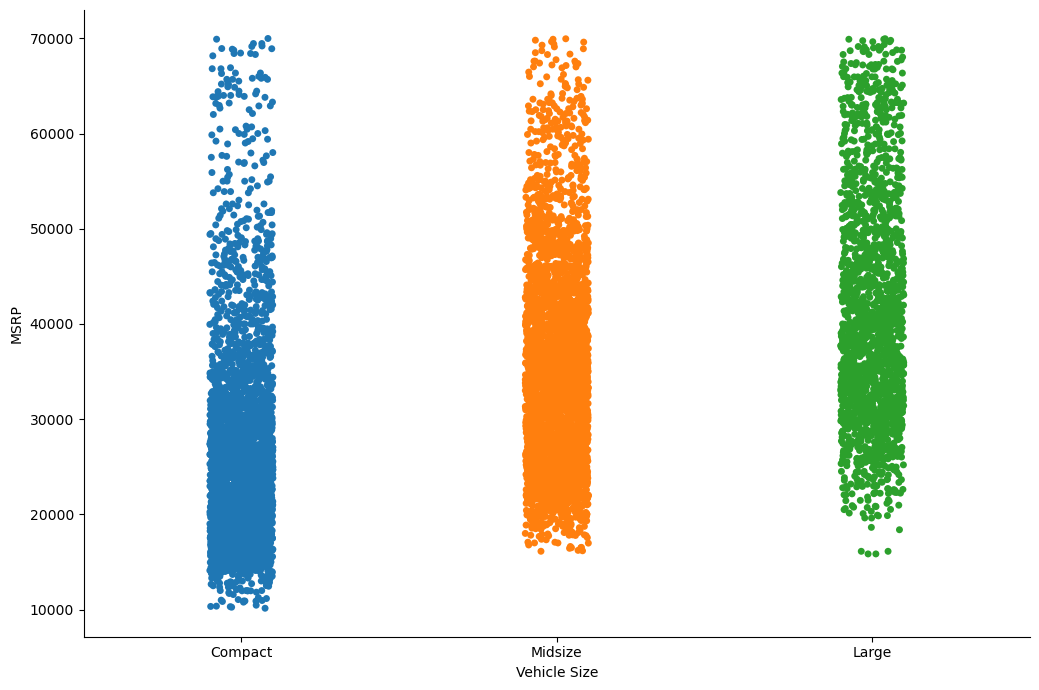

In [60]:
#Catplot to find relationship between 'Vehicle Style' and 'MSRP'

sns.catplot(y="MSRP", x="Vehicle Size", data=df_temp, height=7,aspect=1.5)

From the catplot, I found out that Vehicle Size is sensitive to MSRP.. While, all three vehicle size have cars which are highly priced.. <br>
> MSRP of compact cars start from around 10000 and majority of these cars fall within 14000-35000 MSRP.. 
> MSRP of Midsize cars starts from around 18000 and majority of these cars fall within 20000-52000 MSRP, this is same for Large sized cars as well.. Just that majority of large cars fall within 25000-50000 MSRP.. 

So, let's keep this categorical variable in the potential list of our predictors.. 

### Average MSRP table for each categorical variable:

While we have done our analysis of each categorical variable with the help of catplot, but its better to check how does Average MSRP flucates for each parameter in our variables.. <br>
This would help us infer that if the average MSRP flucuates for each parameter within that Variable, it would mean that that variable is MSRP sensitive.. <br>
Also, it would be a great way to validate our analysis performed with the help of catplot...

In [61]:
global_mean = df_temp['MSRP'].mean()

for col in df_temp.columns[1:]:
    df_group = df_temp.groupby(by=col).MSRP.agg(['mean']).round(2)
    df_group['diff'] = (df_group['mean'] - global_mean).round(2)
    display(df_group)

,mean,diff
Make,,
Chevrolet,31029.92,-2265.21
Ford,33046.47,-248.66
Nissan,30996.06,-2299.07
Other,34525.65,1230.52
Toyota,31605.95,-1689.18
Volkswagen,29024.97,-4270.16


,mean,diff
Engine Fuel Type,,
diesel,40697.71,7402.58
electric,35388.80,2093.67
flex-fuel (premium unleaded recommended/E85),48641.92,15346.79
flex-fuel (premium unleaded required/E85),65461.25,32166.12
flex-fuel (unleaded/E85),35621.83,2326.70
flex-fuel (unleaded/natural gas),39194.17,5899.04
natural gas,28065.00,-5230.13
premium unleaded (recommended),39187.04,5891.91
premium unleaded (required),44272.96,10977.83


,mean,diff
Transmission Type,,
AUTOMATED_MANUAL,35395.52,2100.39
AUTOMATIC,34746.80,1451.67
DIRECT_DRIVE,35097.79,1802.66
MANUAL,26746.41,-6548.72


,mean,diff
Driven_Wheels,,
all wheel drive,39435.72,6140.59
four wheel drive,37110.96,3815.83
front wheel drive,26638.73,-6656.40
rear wheel drive,37801.99,4506.86


,mean,diff
Vehicle Size,,
Compact,26711.81,-6583.32
Large,41093.25,7798.12
Midsize,35278.29,1983.16


,mean,diff
New Vehicle Style,,
Convertible,40187.81,6892.68
Coupe,36252.42,2957.29
Hatchback,23409.49,-9885.64
Pickup,32725.50,-569.63
Sedan,33204.95,-90.18
Van,30561.90,-2733.23
Wagon,29856.61,-3438.52


Well we saw that the parameters within each variable fluctuated with average MSRP,, so its validated that these variables are MSRP sensitive.. So let's keep them all in our list of predictors.. 

**So our final list of predictors** <br>
<b>1 - Numerical Variables :</b> 'Engine HP', 'Year' and 'Highway MPG'<br>
**2 - Categorical Variables :** 'Make', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Vehicle Size', 'New Vehicle Style'

### Now let's quickly deploy the changes ofcategorical variables in main dataframe:

In [62]:
#Merging 'New Vehicle Style' in our main dataframe.. 
df = pd.merge(df,df_temp['New Vehicle Style'],left_index=True,right_index=True)

In [63]:
#Dropping Model and Vehicle Style from main dataframe owing to analysis done above..
df.drop('Model',axis=1,inplace=True)
df.drop('Vehicle Style',axis=1,inplace=True)

In [64]:
# Keeping top 5 Makes and label all the rest as "OTHER" in our main dataframe
keep = df['Make'].value_counts().index[:5]
df['Make'] = np.where(df['Make'].isin(keep), df['Make'], 'Other')

In [65]:
#let's take a look of our revised dataframe...
df.tail()

,Make,Year,Engine Fuel Type,Engine HP,Transmission Type,Driven_Wheels,Vehicle Size,highway MPG,MSRP,New Vehicle Style
8776,Chevrolet,2003,flex-fuel (unleaded/E85),120.00,MANUAL,rear wheel drive,Compact,25,16120,Convertible
8777,Chevrolet,2003,regular unleaded,190.00,MANUAL,four wheel drive,Compact,17,21820,Convertible
8778,Chevrolet,2003,flex-fuel (unleaded/E85),120.00,MANUAL,rear wheel drive,Compact,25,14770,Convertible
8779,Chevrolet,2003,flex-fuel (unleaded/E85),120.00,MANUAL,rear wheel drive,Compact,25,18120,Convertible
8780,Chevrolet,2004,regular unleaded,190.00,AUTOMATIC,four wheel drive,Compact,18,24660,Convertible


### Features Transformation:

Let's now convert our categorical variables into numcerical variables.. and also apply log transform to MSRP..

In [66]:
# Create a new version of 'price' - a log tranformation
df['ln_MSRP'] = np.log1p(df['MSRP'])

#Defining object 'cat_vars' which contains our categorical variables..
cat_vars = ['Make','Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Vehicle Size', 'New Vehicle Style'
           ]
# Loop over categorical vars and encode each one
for var in cat_vars:
    df[var] = df[var].astype("category")

df = pd.get_dummies(df,columns=cat_vars, prefix_sep='_')

In [67]:
#let's see how our final dataset looks before feeding it into Machine learning model...
df.describe()

,Year,Engine HP,highway MPG,MSRP,ln_MSRP,Make_Chevrolet,Make_Dodge,Make_Ford,Make_Honda,Make_Other,Make_Volkswagen,Engine Fuel Type_diesel,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),Engine Fuel Type_flex-fuel (premium unleaded required/E85),Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_flex-fuel (unleaded/natural gas),Engine Fuel Type_natural gas,Engine Fuel Type_premium unleaded (recommended),Engine Fuel Type_premium unleaded (required),Engine Fuel Type_regular unleaded,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Driven_Wheels_all wheel drive,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize,New Vehicle Style_Convertible,New Vehicle Style_Coupe,New Vehicle Style_Hatchback,New Vehicle Style_Pickup,New Vehicle Style_Sedan,New Vehicle Style_Van,New Vehicle Style_Wagon
count,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00,6291.00
mean,2012.70,234.05,28.54,33040.10,10.34,0.07,0.06,0.09,0.06,0.64,0.08,0.02,0.01,0.00,0.00,0.06,0.00,0.00,0.18,0.15,0.58,0.04,0.74,0.01,0.21,0.21,0.09,0.45,0.24,0.41,0.17,0.42,0.05,0.07,0.11,0.16,0.24,0.06,0.06
std,4.59,78.62,9.37,12292.96,0.37,0.26,0.24,0.28,0.24,0.48,0.27,0.14,0.08,0.06,0.03,0.24,0.03,0.02,0.38,0.36,0.49,0.21,0.44,0.08,0.41,0.41,0.28,0.50,0.43,0.49,0.38,0.49,0.23,0.25,0.31,0.36,0.42,0.23,0.23
min,1994.00,66.00,14.00,10135.00,9.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2010.00,173.00,24.00,23950.00,10.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2015.00,220.00,28.00,30535.00,10.33,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2016.00,288.00,32.00,40065.00,10.60,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,2017.00,707.00,354.00,69980.00,11.16,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


It looks great!!!!!!<br>
Let's move on to Machine learning now.....

# Part 2

First, let's define function which will build our model.

In [68]:
def my_summary_stats(X,feature_list):
    temp = pd.DataFrame(dict(mean = X[feature_list].mean().round(2),
                             median = X[feature_list].median().round(2),
                             std_dev = X[feature_list].std().round(2),
                             min_val = X[feature_list].min().round(2),
                             max_val = X[feature_list].max().round(2),
                             outlier_issue = np.where(X[feature_list].std()/X[feature_list].mean() > 2,
                                                      True,False)
                            ))
    return temp

def target_by_cats(X):
    '''
    This function assumes the input dataframe (X) has a numerically defined target
    variable in the first column and that all remaining features are categorical
    '''
    global_mean = X.iloc[:,0].mean()
    target = X.columns[0]
    for col in X.columns[1:]:
        df_group = X.groupby(by=col)[target].agg(['mean']).round(2)
        df_group['diff'] = (df_group['mean'] - global_mean).round(2)
        display(df_group)

Now let's define another function, which will calcuate the performance of our model in training and testing..

In [69]:
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','Adj-R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    
    train_metrics = [r2, adj_r2,
                     mean_absolute_error(y_train,y_hat).round(3),
                     mean_absolute_percentage_error(y_train,y_hat).round(3)*100,
                     (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
                    ]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    print(all_metrics)

In [70]:
#looking how many columns do we have..
#df.columns

# Data Partition

Let's now Split our data into Training and Testing.. I would go ahead with 70-30 Split, as data size is big, and I believe this would be a good split to train the data and then validate it with test data..

In [71]:
# Defining the list of predictors
predictors = ['Year', 'Engine HP', 'highway MPG', 'Make_Chevrolet',
       'Make_Dodge', 'Make_Ford', 'Make_Honda', 'Make_Other',
       'Make_Volkswagen', 'Engine Fuel Type_diesel',
       'Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/natural gas)',
       'Engine Fuel Type_natural gas',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded',
       'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Driven_Wheels_all wheel drive', 'Driven_Wheels_four wheel drive',
       'Driven_Wheels_front wheel drive', 'Driven_Wheels_rear wheel drive',
       'Vehicle Size_Compact', 'Vehicle Size_Large', 'Vehicle Size_Midsize',
       'New Vehicle Style_Convertible', 'New Vehicle Style_Coupe',
       'New Vehicle Style_Hatchback', 'New Vehicle Style_Pickup',
       'New Vehicle Style_Sedan', 'New Vehicle Style_Van',
       'New Vehicle Style_Wagon']

#defining our target variable which is log-transform of MSRP
target = ['ln_MSRP']

X = df[predictors]
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=2)

# Machine Learning

### Model 1 <br>
> Let's build a Simple Regression Model first...<br>
> Choosing 'Engine Hp' as my predictor because this variable is highly most correlated with MSRP

To check performance of our Models, we will use some metrics.. Let me define them below: <br><br>

> **R-Squared or R2 :** This represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.<br><br>
> **Adjusted R squared or Adj-R2 :** This is a modified version of R square, and it is adjusted for the number of independent variables in the model, and it will always be less than or equal to R².In the formula below n is the number of observations in the data and k is the number of the independent variables in the data.<br><br>
> **Mean Absolute Error or MAE:** This represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.<br><br>
> **Mean Absolute Percentage Error or MAPE:** This measures accuracy of a forecast system. It measures this accuracy as a percentage, and can be calculated as the average absolute percent error for each time period minus actual values divided by actual values.<br><br>
> **Mean Squared Error or SSE:** This represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

Now, let's compute the performance of our first Model...

In [72]:
#Defining Simple variable which is our predictor..
simple_var = ['Engine HP']

#model which is linear regression
model = LinearRegression()

#fitting target variable with predictor.
model.fit(X_train[simple_var],y_train)

# Display Output
train_test_metrics(X_train[simple_var],X_test[simple_var],y_train,y_test,model)

        Train  Test
R2       0.61  0.62
Adj-R2   0.61  0.62
MAE      0.18  0.18
MAPE     1.70  1.70
SSE    226.06 97.47


The model says.. <br>
**Mape of Training Data :** 1.70 <br>
**Mape of Training Data :** 1.70 <br>
This means the model performance is **good**.. This is also because we took log transform of our target variable.. <br>
But coming again to Model, There is **no evidence of overfitting** as my model has performed same on Training and Test Data.

In [73]:
round((math.exp(model.coef_[0])-1)*100,2)

0.36

0.36 is the slope of our simple linear regression model.. This says that if we increase the 'Engine Hp' by 1 unit, our MSRP will increase by 36%...

### Model 2 <br>
> Let's build a Multiple Regression Model now which would have one numerical and one categorical variable in the predictor...<br>
> Choosing 'Engine Hp' as my numerical predictor because this variable is highly most correlated with MSRP and 'Engine Fuel Type' as the categorical variable because MSRP proved to be very sensitive with this attribute...<br>

Now, let's compute the performance of our second model..

In [74]:
predictors = ['Engine HP','Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/natural gas)',
       'Engine Fuel Type_natural gas',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded']

model2 = LinearRegression()
model2.fit(X_train[predictors],y_train)

# Display Output
train_test_metrics(X_train[predictors],X_test[predictors],y_train,y_test,model2)

        Train  Test
R2       0.68  0.70
Adj-R2   0.68  0.70
MAE      0.16  0.16
MAPE     1.60  1.50
SSE    184.98 77.75


The model says.. <br>
**Mape of Training Data :** 1.60 <br>
**Mape of Training Data :** 1.50 <br>
This means the model performance is **better than first model**..<br>
This is because, we have fitted one more variable in the model, so the accuracy of model has improved..<br>
Also, There is **no evidence of overfitting**, perhaps my model has outperformed because the MAPE in test data is lesser than the training data..

In [75]:
print('Slope of Engine HP:',round((math.exp(model2.coef_[0][0])-1)*100,2))
print('Slope of Electric Engine Fuel Type:',round((math.exp(model2.coef_[0][1])-1)*100,2))

Slope of Engine HP: 0.33
Slope of Electric Engine Fuel Type: -3.45


This means that if we increase the Engine HP by 1 unit, our MSRP would increase by 95% and if we **choose** the Engine Fuel Type as **'Electric'**, our MSRP would increase by 27%

### Model 3 <br>
> Let's build a Final Regression Model now which would have any numerical and any categorical variables in the predictor list...<br>
> Here I am choosing all the numerical and categorical variables from my dataset, because after we cleaned the dataset, I found all these attributes are MSRP sensitive..<br>

Now, let's compute the performance of our final model..

In [76]:
predictors = ['Year', 'Engine HP', 'highway MPG', 'Make_Chevrolet',
       'Make_Dodge', 'Make_Ford', 'Make_Honda', 'Make_Other',
       'Make_Volkswagen', 'Engine Fuel Type_diesel',
       'Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/natural gas)',
       'Engine Fuel Type_natural gas',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded',
       'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Driven_Wheels_all wheel drive', 'Driven_Wheels_four wheel drive',
       'Driven_Wheels_front wheel drive', 'Driven_Wheels_rear wheel drive',
       'Vehicle Size_Compact', 'Vehicle Size_Large', 'Vehicle Size_Midsize',
       'New Vehicle Style_Convertible', 'New Vehicle Style_Coupe',
       'New Vehicle Style_Hatchback', 'New Vehicle Style_Pickup',
       'New Vehicle Style_Sedan', 'New Vehicle Style_Van',
       'New Vehicle Style_Wagon']

model2 = LinearRegression()
model2.fit(X_train[predictors],y_train)

# Display Output
train_test_metrics(X_train[predictors],X_test[predictors],y_train,y_test,model2)

        Train  Test
R2       0.79  0.79
Adj-R2   0.79  0.79
MAE      0.13  0.13
MAPE     1.30  1.30
SSE    121.80 52.90


The model says.. <br>
**Mape of Training Data :** 1.30 <br>
**Mape of Training Data :** 1.30 <br>
This means the model performance is **better than first model and second model.**..<br>
This is because, we have fitted all those variables which are MSRP sensitive in the model, so the accuracy of model has further improved..<br>
Also, There is **no evidence of overfitting**, as the model has performed the same in training and testing...

# Conclusion:

Yes, I am satisfied with my final model performance, because in the whole extensive exercise where we cleaned the dataset, The variables in predictors are highly MSRP sensitive, also we cleaned our target variable and took log transform for making it normally distributed..<br>
Our selection of these variables also resulted in final model performing better than first and second model.. <br><br>

### What's next??

Next, I would propose that we should further deep dive and understand the impact of parameters in categorical variables.. Like how we found out in second model that if we **choose** the Engine Fuel Type as **'Electric'**, our MSRP would increase by 27%.. <br>
We should get results for all those categorical variables and make a best list out of it. <br>
For example, Engine Fuel Type as **Flex Fuel** is most highly correlated with MSRP, Transmission Type as **Automatic** is most highly correlated with MSRP and so on.. <br>
With this analysis in hand, we could present this to car manufacturers and tell them how these particular selection within features of car can have impact on the Price of the car... <br><br>

#### My recommendation to the leadership of car manufacturers: <br>
1. While planing to build a car, first do the customer segmentation, This would come from market research, like what is the requirement of customers from each segments.. 
2. Once customer segmentation is done, Let's prepare a excel sheet and create tables for each variables and infront of the parameters of those variables, Mention the impact they have on MSRP. 
3. We could also present a model in excel which showcases the combination of all features and the predicted price of the car. 
4. So, If manufacturer want to build a cheaper car, they could use that model to see which features to select so that the Price of car comes down lower and vice versa if they want to build top rated car..